# Motivation and Big-O

## Outline

-   Motivation

-   Time Complexity: Introduction to Big-O Notation

-   Average, Best, and Worst Case

-   Space Complexity

## About Me

-   PhD candidate in the Department of Computer Science at UofT

-   Thesis is on remote patient monitoring using wearables and mobile
    devices

-   Did BSc from Vancouver (SFU) and MSc from UofT

-   Co-Founder of a remote patient monitoring startup (Tabiat)

## Why should a Data Scientist take this Course?

-   Problem solving. This course provides you with a framework to solve
    coding problems you may encounter in your career.

-   Efficient programs. We want to write programs that scale well with
    big data.

-   Interview preparation. Many data science jobs require a technical
    interview, which involes solving algorithms problems.

## Learning Objectives

-   Assess options and choices around methods to solve problems and data
    representation methods using Big-O notation.

-   Develop comfort with recursive functions.

-   Decide on appropriate methods to represent data for a problem.

-   Take a client-led problem and translate it into an optimization
    problem.

-   Identify why code is running slowly and know how to improve its
    performance.

# Motivating Code Demos

## What are Algorithms and Data Structures

-   An **algorithm** is a procedure to solve a problem

    -   Sort a data observations from smallest to largest

    -   Find the nearest neighbor to a data point

    -   How fast is each algorithm?

-   A **data structure** is a concrete method to store some data.

    -   A pandas data set is a good way to store observations with many
        features.

    -   How much space does the data sturcture need? How long does it
        take to access each observation?

In [1]:
import numpy as np
import timeit
import random

## Loop Versus Vectorized Operations

In [2]:
size = 10**4

# Using Python lists
list_a = list(range(size))
list_b = list(range(size))

# Using NumPy arrays
array_a = np.arange(size)
array_b = np.arange(size)

# Timing for list addition
list_time = timeit.timeit(lambda: 
  [a + b for a, b in zip(list_a, list_b)], number=1)

# Timing for vectorized array addition
array_time = timeit.timeit(lambda: 
  array_a + array_b, number = 1)

## Loop Versus Vectorized Operations

We will learn about what vectorized is in lecture 6.

In [3]:
print(f"List Addition: {list_time:.6f} seconds")
print(f"Vectorized Addition: {array_time:.6f} seconds")

List Addition: 0.000406 seconds
Vectorized Addition: 0.000333 seconds

-   Why was the NumPy vectorized operation much faster?

-   How can we describe how much faster the vectorized operation is?

-   This is useful in many iterative algorithms, such as gradient
    descent.

## Search in List Versus Set

We will learn about searching and sorting in lecture 2.

In [4]:
# Python list
list_time = timeit.timeit(lambda:
  -1 in list_a, number = 1)
  
# Python set
set_a = set(range(size))
set_time = timeit.timeit(lambda:
  -1 in set_a, number = 1)

## Search in List Versus Set

In [5]:
print(f"List Search: {list_time:.6f} seconds")
print(f"Set Search: {set_time:.6f} seconds")

List Search: 0.000064 seconds
Set Search: 0.000001 seconds

-   Why was the set search much faster?

-   How can we describe how much faster the vectorized operation is?

-   What are the pros and cons of choosing each data structure?

## Selection Sort Versus Python Sort

For context, selection sort is a naive sorting algorithm, while Python
implements Tim Sort for the default search function.

In [6]:
def selection_sort(arr):
  n = len(arr)
  
  for i in range(n):
    min_index = i
    for j in range(i+1, n):
      if arr[j] < arr[min_index]:
        min_index = j
        
    arr[i], arr[min_index] = arr[min_index], arr[i]

## Selection Sort Versus Python Sort

In [7]:
random.shuffle(list_a)
rand_list = list_a.copy()

sel_time = timeit.timeit(lambda:
  selection_sort(rand_list.copy()), number = 1)
  
py_time = timeit.timeit(lambda:
  sorted(rand_list.copy()), number = 1)

## Selection Sort Versus Python Sort

In [8]:
print(f"Selection sort: {sel_time:.6f} seconds")
print(f"Tim sort: {py_time:.6f} seconds")

Selection sort: 1.421455 seconds
Tim sort: 0.001110 seconds

-   Why was selection sort much slower than Tim sort (not in detail)?

-   If we double the size of the list, how much slower will the code be
    in each case?

# Time Complexity: Introduction to Big-O Notation

## An example

-   Imagine you are writing an algorithm to search for a landing
    position for a rocket. You want it to be simple (to avoid bugs) and
    fast (since you only have 10 seconds to find a site). [1]

-   It takes 1 millisecond to check each element. You decide to test a
    simple search and binary search on 100 elements (more on these
    methods later).

    -   Simple search takes 100ms. Binary search takes 7ms.

-   Then you test binary search with 1 billion elements and it takes
    32ms.

    -   Binary search is about 15 times faster than simple search,
        because simple search took 100 ms with 100 elements, and binary
        search took 7 ms. So simple search will take 30 × 15 = 450ms
        with 1 billion elements.

-   Since that is within your threshold, you decide to go with simple
    search. **Is this correct?**

## A practical example

-   Definitely wrong!!
-   The run time of different algorithms can grow at different rates.
-   Big-O tells us how run time increases as the list size increases.

### Comparing run times of simple and binary search

| Elements      | Simple Search | Binary Search |
|---------------|---------------|---------------|
| 100           | 100 ms        | 7 ms          |
| 10,000        | 10 s          | 14 ms         |
| 1,000,000,000 | 11 days       | 32 ms         |

## Big-O Notation

-   Big-O tells you how fast an algorithm is in terms of the number of
    operations, $n$.

-   Simple search needs to take each element, so it will take $n$
    operations. The run time in Big-O notation is $O(n)$.

-   Binary search needs log $n$ operations, so the run time in Big-O
    notation is $O(\text{log}n)$

    -   Note: log in computer science usually refers to log base 2.

## Big-O is Upper Bound Run Time

-   Big-O notation is about the *worst-case* scenario.

    -   If you were conducting linear search through a phone book, even
        if you were looking for Abe Aberdeen, it is still considered
        $O(n)$.

-   Formally, it characterizes an upper bound on the asymptotic behavior
    of the run time.

-   For example, the function $7n^3 + 30n^2 - 200n + 9$ has
    highest-order term $7n^3$. The function’s growth rate is $n^3$
    because the function grows no faster than $n^3$. The Big-O is
    $O(n^3)$.

## Common Big-O Run Times

Here are seven Big-O run times that you’ll encounter frequently, sorted
from fasted to slowest.

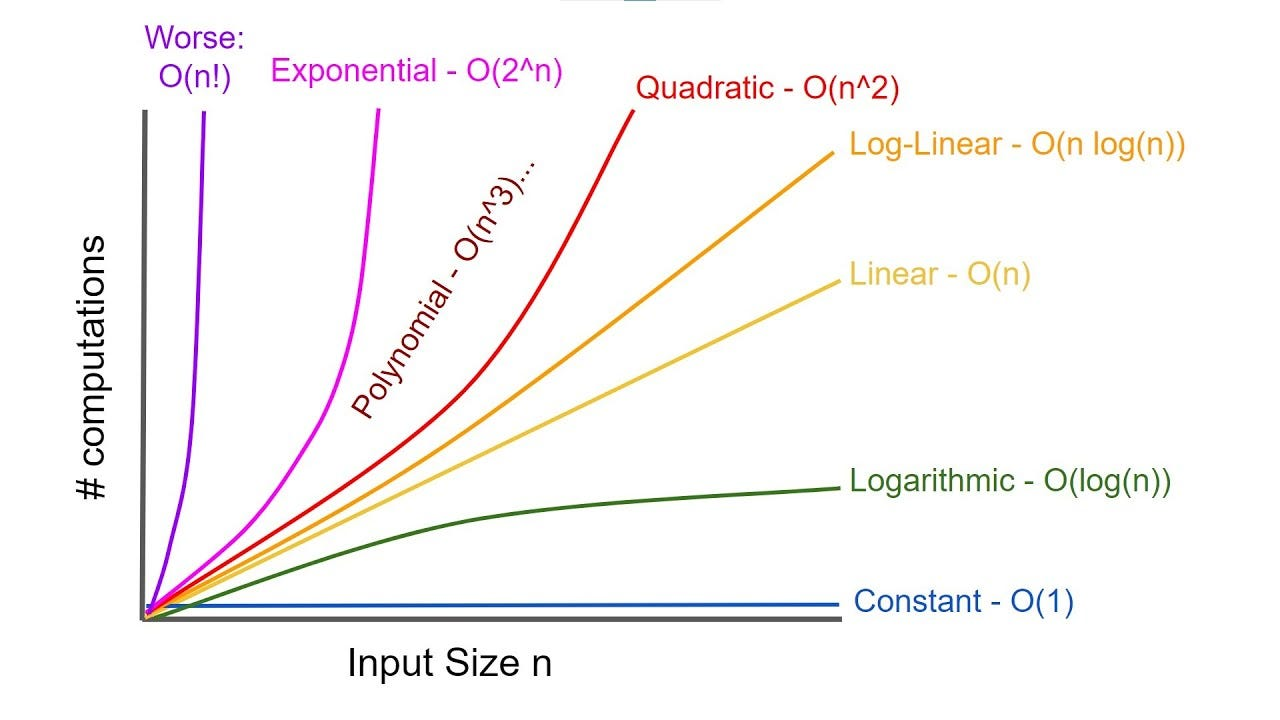

-   $O(1)$, known as *constant time*. Ex: addition, division

-   $O(\text{log}n)$, known as *logarithmic time*. Ex: binary search

-   $O(n)$, known as *linear time*. Ex: Linear search

-   $O(n\text{log}n)$. Ex: Tim Sort

-   $O(n^2)$, known as *quadratic time*. Ex: Selection sort.

-   $O(2^n)$, known as *exponential time*. Ex: Naive recursive solution
    for nth Fibonacci number

-   $O(n!)$, known as *factorial time*. Ex. Traveling salesperson

## Determining Time Complexity

Consider the following code. How can you determine the Big-O?

[1] Example from Grokking Algorithms

In [9]:
def f(n):
  for i in range(n):
    for j in range(n):
      print(i, j)

## Determining Time Complexity

-   With “raw” Python code, you can usually count the number of nested
    `for` loops to determine the Big-O

    -   A loop gives $O(n)$

    -   A nested loop gives $O(n^2)$

-   It’s usually not so simple in Data Science because of packages we
    use.

-   There are many factors affecting the constants in your run time

    -   How complicated is each step? Is it $n$ or $2000n$?

    -   How are your algorithms implemented? Is your programming
        language fast? Are your libraries fast?

-   Implementation issues will be covered later in the course.

## Big-O with Two Variables

Consider the following code. What is it’s Big-O?

In [10]:
def fun(n,m):
  for i in range(n):
    for j in range(m):
      print("Hello")

## Big-O with Two Variables

-   The time complexity here is $O(nm)$.

    -   If $n = m$, then $O(n^2)$.

-   All terms should be combined into one Big-O

    -   $O(nm)$ is correct and $O(n)O(m)$ is incorrect.

    -   $O(n + m)$ is correct and $O(n) + O(m)$ is incorrect.

    -   $O(n^2 + mn + m)$ is written as $O(n^2 + nm)$. We can’t throw
        away either term because we don’t know which term will dominate.

-   Important to think about this when working with datasets.

    -   They have $n$ rows and $p$ columns.

    -   Can you reason how long it will take to fit a decision tree?

# Best, Average, and Worst Case

## Best, Average, and Worst Case

-   Big-O deals with worst case.

-   If we can develop a notion of an “average input,” then we can devise
    the average case of an algorithm.

-   Best case is useful to think about the constants in your algorithm.

    -   $O(\text{log}n)$ is always faster than $O(n)$ expect with very
        small $n$.

# Space Complexity

## What is Space Complexity

-   Aside from our algorithm taking too long to run, its also an issue
    if you run out of memory.

    -   Note, memory (RAM), is not the same as disk space.

    -   The computer will load data into memory from the disk

-   It will be problematic if you need to load 2 billion observations
    all at once.

-   We can also analyze space complexity with Big-O notation

-   Notice that time complexity is usually about the *algorithm*, while
    space complexity is about the *data structure*.

## Examples

-   Code that prints `hello {your name}` will have $O(1)$ space.

-   Code that sums a list of size $n$ has $O(n)$ space.

-   You have users on Instagram, and you want to store who follows who.
    The answer depends (why?). The worst case space is $O(n^2)$

# Recommended Problems and References

## Recommended Problems

-   Cormen: Chapter 1 exercises

    -   1.2-1, 1.2-2, 1.2-3

-   Bhargava: Chapter 1 exercises

    -   1.3 to 1.5

-   Additional (for the mathematically inclined)

    -   In CS, log is usually base 2, but a strong distinction is not
        made because *logs of different bases only differ by a constant
        factor* and constants are dropped in Big-O. Show this is true

    -   Show that exponents of different bases **do not** differ by a
        constant factor

## References

-   Bhargava, A. Y. (2016). *Grokking algorithms: An illustrated guide
    for programmers and other curious people.* Manning. Chapter 1.

-   Cormen, T. H. (Ed.). (2009). *Introduction to algorithms* (3rd ed).
    MIT Press. Chapter 1 and 3.